<a href="https://colab.research.google.com/github/FelipePRosa/Sigmoidal-Data-Science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro
<left><img alt="rio de janeiro" width="60%" src="https://image.freepik.com/fotos-gratis/paisagem-do-rio-de-janeiro-cercada-pelo-mar-sob-um-ceu-azul-no-brasil_181624-14153.jpg"></left>

*by [Felipe Rosa](https://www.linkedin.com/in/felipe-rosa-19975b10b/)*<br>
*Blog: [Medium](https://medium.com/@felipepimentelrosa)*

---
<br>

A violência no Brasil sempre foi um fator preocupante e com índices evolutivos ao longo da história. O fato é que ela atinge todas cidades e vem ganhando cada vez mais notoriedade nos noticiários.

Em dados gerais, o Rio de Janeiro não se encontra nas posições mais elevadas de indíces de violência, como por exemplo taxa de homicídio a cada 100 mil habitantes na capital (24ª posição das 27 capitais) e no estado (18ª posição no ranking), segundo os dados do Datasus para 2015.

Por outro lado, em um ranking das taxas de homicídio por
cem mil habitantes dos municípios das periferias das Regiões
Metropolitanas do Rio, São Paulo e Belo Horizonte2, 15 dos 20
municípios da metrópole carioca estão entre os 25 municípios com
maiores taxas de homicídio. Isso pelo fato do Rio de Janeiro viver um ciclo vicioso de desigualdade, violência e desenvolvimento desde 1970.

De 2013 para 2016, o estado que se localizava na 8ª posição das 27 capitais brasileiras, em comparativos de renda pública per capita, caiu 9 posições, ocupando agora a 17ª no ranking.

## Obtenção dos Dados

As leis de divulgação e transparência de dados e acesso à informação, combinado com a conscientização da população e dos órgãos públicos, proporcionam a disserminação e a disponibilização de diversas fontes de dados relevantes para a população, e cruciais para uma análise mais aprofundada.

O [portal ISPDados](http://www.ispdados.rj.gov.br/) do Rio de Janeiro é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro e trás essas informações de forma aberta.

<left><img alt="ISPDados" width="20%" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNoWJigYVYIMmSvg_p9emC07albOaIfLSukA&usqp=CAU"></left>

Todos os dados registrados pelo ISP são recorrentes de Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro.

Para validação das informações inseridas no banco de dados, os Registros de Ocorrência antes são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). Dessa forma as estatísticas apresentadas no banco de dados disponibilizado pela ISPDados são organizadas por data do registro, além de diversas outras informações que serão abordadas ao longo deste documento. 

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

In [302]:
### Importando os dados
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

In [ ]:
#Tamanho do dataset
print('Quantidade de Registros de Ocorrência :',df.shape[0])
print('Quantidade de Informação por RO :',df.shape[1])

Quantidade de Registros de Ocorrência : 344
Quantidade de Informação por RO : 56


In [ ]:
#Informações disponibilizadas no dataset, valores ausêntes e o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

In [ ]:
#Primeiros Registros de Ocorrência
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
#Porcentagem de valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Usando o método `describe()` podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.


In [ ]:
#resumo estatístico do DataFrame 
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes Contra o Patrimônio - Veículos

Vamos dedicar essa seção do projeto para investigar dados em relação aos crimes de roubo e furto de veículos.

Problema comum nas grandes metrópoles brasileiras, esse tipo de crime merece destaque em nosso projeto. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [206]:
#Visualização de ocorrências de furto/roubo de veículo e recuperação
df['perda_veiculos_total'] = df.roubo_veiculo + df.furto_veiculos
df['porcentagem_recuperacao'] = round((df.recuperacao_veiculos / df.perda_veiculos_total)*100,2)

print('Média de veículos perdidos por mês: {:.2F}'.format(df.roubo_veiculo.mean()+df.furto_veiculos.mean()))
print('Média de veículos recuperados por mês: {:.2F}'.format(df.recuperacao_veiculos.mean()))

print('Porcentagem dos veículos recuperados por mês: ', round(df.recuperacao_veiculos.mean()/(df.roubo_veiculo.mean()+df.furto_veiculos.mean())*100,2), '%')

Média de veículos perdidos por mês: 4123.37
Média de veículos recuperados por mês: 1772.24
Porcentagem dos veículos recuperados por mês:  42.98 %


In [181]:
#Meses com mais roubos e furtos somados
df[['vano','mes','roubo_veiculo','furto_veiculos','perda_veiculos_total','recuperacao_veiculos','porcentagem_recuperacao']].sort_values(by=['roubo_veiculo']+['furto_veiculos'], ascending=False)

,vano,mes,roubo_veiculo,furto_veiculos,perda_veiculos_total,recuperacao_veiculos,porcentagem_recuperacao
326,2018,3,5358,1249,6607,3450,52.22
324,2018,1,5286,1264,6550,3695,56.41
314,2017,3,5002,1428,6430,2932,45.60
318,2017,7,4951,1206,6157,3476,56.46
315,2017,4,4891,1289,6180,3481,56.33
...,...,...,...,...,...,...,...
7,1991,8,1347,1835,3182,809,25.42
68,1996,9,1312,1637,2949,790,26.79
2,1991,3,1265,2084,3349,789,23.56
0,1991,1,1174,2009,3183,872,27.40


In [ ]:
df[df.roubo_veiculo == df.roubo_veiculo.max()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
326,2018,3,508,6.0,20,109.0,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,643,11206,5358,66035.0,3


In [ ]:
df[df.roubo_veiculo == df.roubo_veiculo.min()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3


### Crimes Contra a Vida

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.

In [ ]:
print("Min:\t{}".format(df.hom_doloso.max()))
print("Max:\t{}".format(df.hom_doloso.min()))

Min:	831
Max:	272


In [ ]:
#Mês com maior quantidade de homicídios dolosos
df[df.hom_doloso == df.hom_doloso.max()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [ ]:
#Mês com menor quantidade de homicídios dolosos
df[df.hom_doloso == df.hom_doloso.min()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [208]:
#Meses com mais atentados à vida
df['atentado_a_vida'] = (df.hom_doloso + df.tentat_hom + df.hom_culposo)
df[['hom_culposo','hom_doloso','tentat_hom']] = df[['hom_culposo','hom_doloso','tentat_hom']].fillna(0.0)
df[['vano','mes','hom_doloso','hom_culposo','tentat_hom','atentado_a_vida']].sort_values(by=['hom_doloso'], ascending=False)

,vano,mes,hom_doloso,hom_culposo,tentat_hom,atentado_a_vida
48,1995,1,831,0.0,166,997.0
47,1994,12,826,0.0,196,1022.0
49,1995,2,814,0.0,179,993.0
51,1995,4,788,0.0,170,958.0
52,1995,5,784,0.0,149,933.0
...,...,...,...,...,...,...
294,2015,7,306,146.0,484,936.0
270,2013,7,302,176.0,317,795.0
258,2012,7,298,227.0,329,854.0
259,2012,8,294,220.0,349,863.0


Acima, podemos identificar a taxa de decaimento dos homicídios dolosos pela variável `hom_doloso` ao longo do período observado no dataset.

Da mesma forma é possível observar um crescimento nos homicídios culposos e nas tentativas de homicídio, identificado pelas coluna `hom_culposo` e `tentat_hom` respectivamente.

Estes são dados interessantes já que os índices no geral de atentado à vida praticamente se mantiveram. A mudança se deu no aumento de tentativas principalmente, porém na queda dos homicídios dolosos.

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável `hom_doloso`.


Média de Homicídios Dolosos: 504.6
Média de Homicídios Culposos: 160.3
Média de Tentativas de Homicídio: 318.3


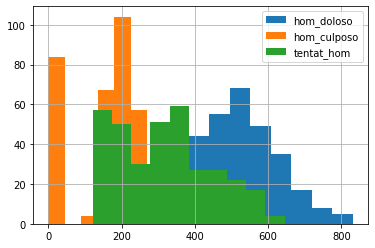

In [234]:
# plotar histograma hom_doloso
print('Média de Homicídios Dolosos: {:.4}'.format(df.hom_doloso.mean()))
print('Média de Homicídios Culposos: {:.4}'.format(df.hom_culposo.mean()))
print('Média de Tentativas de Homicídio: {:.4}'.format(df.tentat_hom.mean()))
df.hom_doloso.hist(legend=True);
df.hom_culposo.hist(legend=True);
df.tentat_hom.hist(legend=True);

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo, que abrange a média encontrada acima.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.
* Outras possíveis análises pertinentes...

Por último, vamos analisar as variáveis de roubos ocorridos ao longo dos anos utilizando um gráfico de linha.

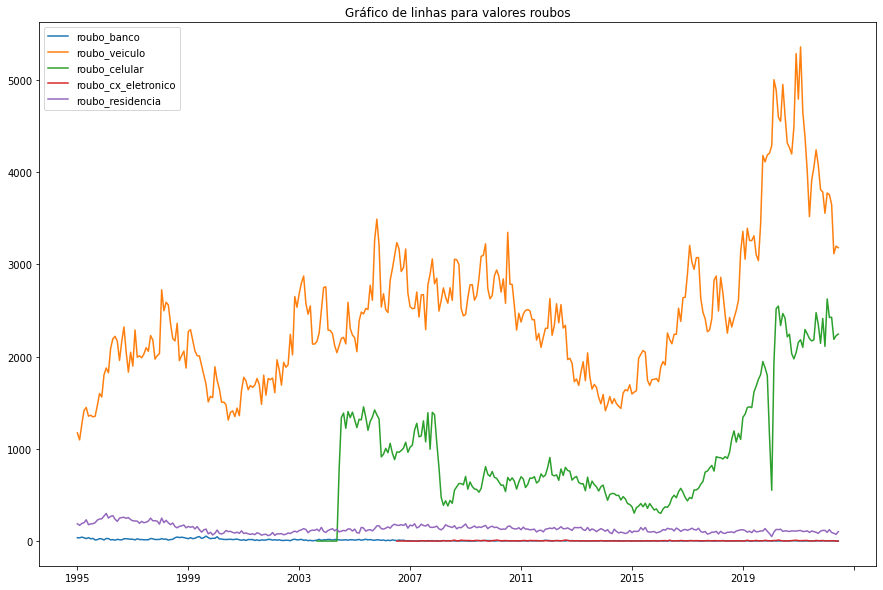

In [301]:
# plotar gráfico de linhas para os roubos
ax = df.roubo_banco.plot(legend=True, x_compat=True, figsize=(15,10), title='Gráfico de linhas para valores roubos');
df.roubo_veiculo.plot(legend=True);
df.roubo_celular.plot(legend=True);
df.roubo_cx_eletronico.plot(legend=True);
df.roubo_residencia.plot(legend=True);
ax.set_xticklabels(df.vano[::int(round(df.shape[0]/7,0))]);

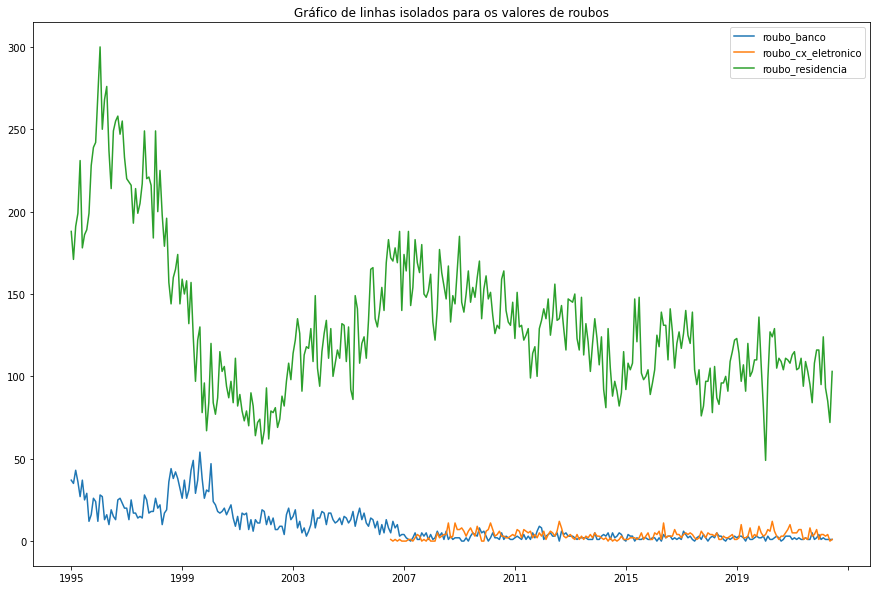

In [284]:
# plotar gráfico de linhas isolados para os valores menores
ax = df.roubo_banco.plot(legend=True, figsize=(15,10) ,title='Gráfico de linhas isolados para os valores de roubos');
df.roubo_cx_eletronico.plot(legend=True);
df.roubo_residencia.plot(legend=True);
ax.set_xticklabels(df.vano[::int(round(df.shape[0]/7,0))]);

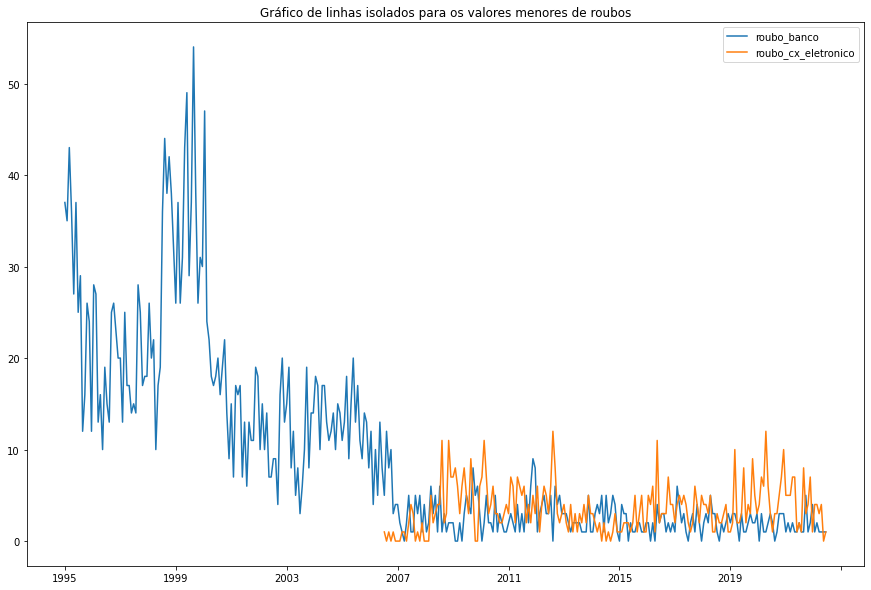

In [281]:
# plotar gráfico de linhas isolados para os valores menores
ax = df.roubo_banco.plot(legend=True, figsize=(15,10), title='Gráfico de linhas isolados para os valores menores de roubos');
df.roubo_cx_eletronico.plot(legend=True);
ax.set_xticklabels(df.vano[::int(round(df.shape[0]/7,0))]);

## Conclusão

A princípio dev ser levado em consideração de que as informações apresentados no banco de dados em questão são referentes aos Rgistros de Ocorrência relatados na Polícia Civil. Logo, não há como realizar uma análise absoluta e perfeita de todas as ocorrências no Rio de Janeiro.

Os dados não apresentaram nenhum outlier **nítido**, mostrando uma boa coerência e levando confiança aos resultados obtidos das análises. Por esse mesmo motivo é possível se aprofundar mais e realizar a extração e transformação dos dados por meio deste dataset.